In [35]:
import numpy as np
import pandas as pd
import math
import matplotlib.pyplot as plt
import warnings
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import make_scorer, mean_squared_error
from sklearn.svm import SVR
from sklearn.model_selection import GridSearchCV, cross_val_score
from scipy import stats
from sklearn import metrics
from sklearn.metrics import make_scorer, mean_squared_error
from sklearn.metrics import mean_absolute_error
warnings.filterwarnings("ignore")
plt.style.use('seaborn-darkgrid')

In [3]:
# ls /work/sds-lab/Ashis/Hist_prss/

In [4]:
df=pd.read_csv('/work/sds-lab/Ashis/Hist_prss/ML_dataframe.csv')

In [5]:
df

,Date,Precipitation,Temperature,Relative_humidity,Air_Pressure,PRW
0,1/1/1915,3.900000e-05,275.14020,83.499230,83609.850,2.784520
1,1/2/1915,6.770000e-05,280.52010,88.843410,83221.570,3.970052
2,1/3/1915,1.750000e-06,276.48587,95.272660,83625.350,3.120856
3,1/4/1915,2.870000e-05,279.44635,88.040890,83994.516,2.128633
4,1/5/1915,1.280000e-08,267.71445,80.809130,84009.480,2.024976
...,...,...,...,...,...,...
36495,12/27/2014,5.570000e-05,273.45140,64.560680,83678.870,6.425169
36496,12/28/2014,5.180000e-08,274.76535,63.451500,83346.450,7.488951
36497,12/29/2014,3.000000e-10,272.95187,62.342327,83224.750,7.951182
36498,12/30/2014,3.810000e-07,274.79710,85.251480,83244.586,8.224910


In [14]:
df_num=pd.read_csv('/work/sds-lab/Ashis/Hist_prss/ML_dataframe.csv',parse_dates=['Date'],index_col=['Date'])
df_num=df_num.loc[:,['Precipitation','Temperature','Relative_humidity','Air_Pressure','PRW']]
df_num.head()

,Precipitation,Temperature,Relative_humidity,Air_Pressure,PRW
Date,,,,,
1915-01-01,3.900000e-05,275.14020,83.49923,83609.850,2.784520
1915-01-02,6.770000e-05,280.52010,88.84341,83221.570,3.970052
1915-01-03,1.750000e-06,276.48587,95.27266,83625.350,3.120856
1915-01-04,2.870000e-05,279.44635,88.04089,83994.516,2.128633
1915-01-05,1.280000e-08,267.71445,80.80913,84009.480,2.024976


In [15]:
df_num.columns

Index(['Precipitation', 'Temperature', 'Relative_humidity', 'Air_Pressure',
       'PRW'],
      dtype='object')

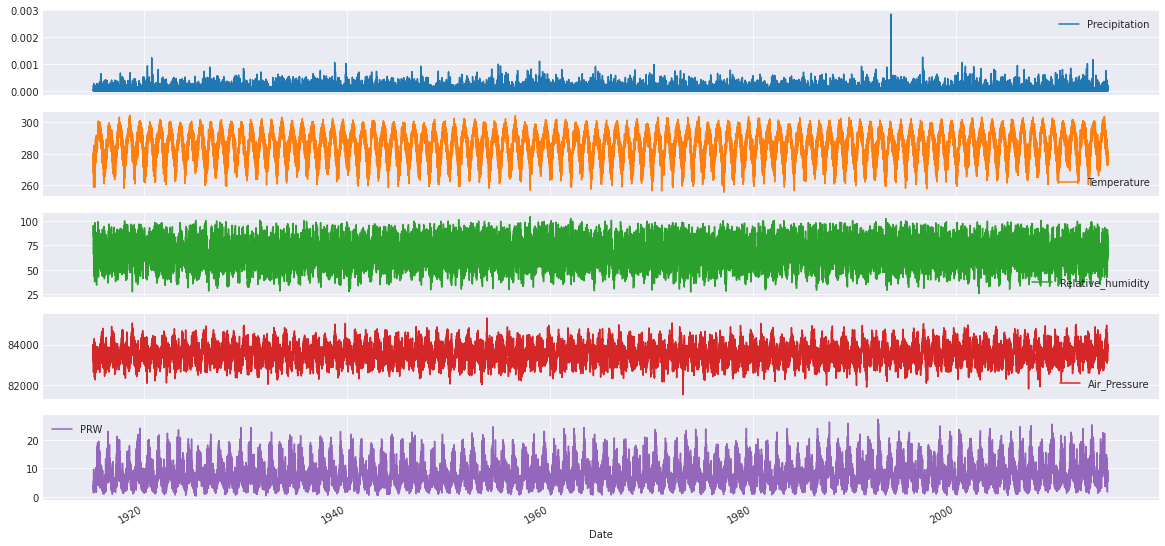

In [16]:
df_num.plot(subplots=True, figsize=(20,10))
plt.savefig('indv_ft.png')

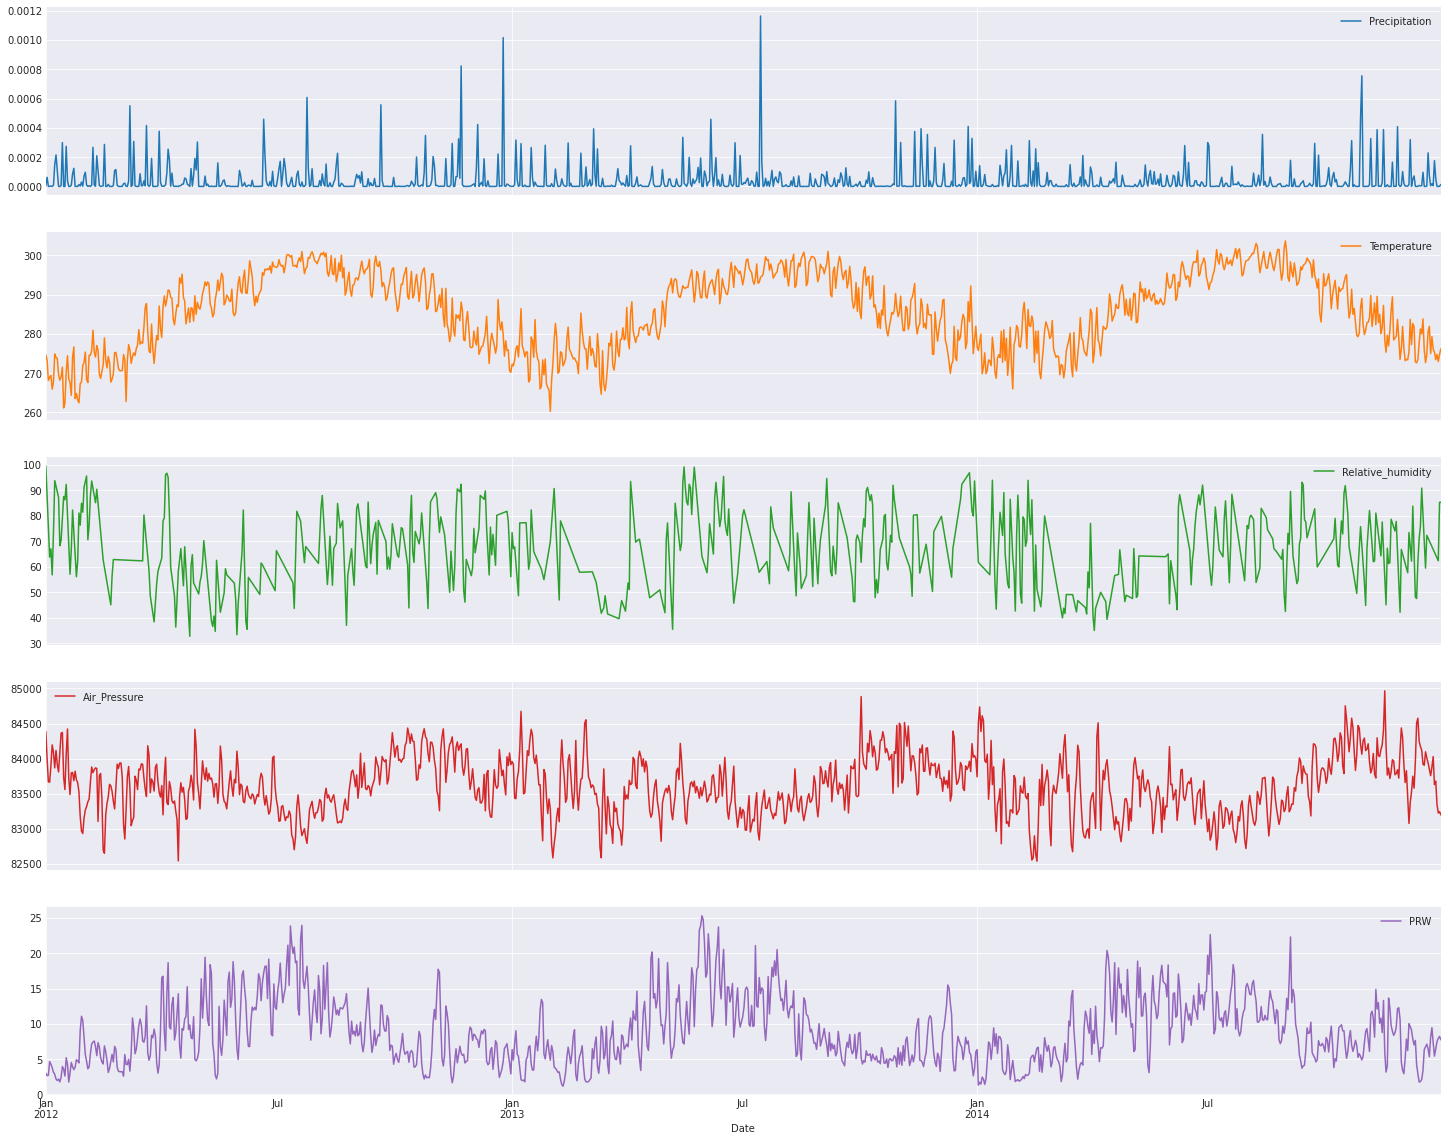

In [17]:
df_num['2012':'2014'].resample('D').fillna(method='pad').plot(subplots=True, figsize=(25,20))
plt.savefig('indv_ft_2y.png')

In [25]:
df_y=df_num.pop("Temperature")
df_x=df_num

In [26]:
df_x

,Precipitation,Relative_humidity,Air_Pressure,PRW
Date,,,,
1915-01-01,3.900000e-05,83.499230,83609.850,2.784520
1915-01-02,6.770000e-05,88.843410,83221.570,3.970052
1915-01-03,1.750000e-06,95.272660,83625.350,3.120856
1915-01-04,2.870000e-05,88.040890,83994.516,2.128633
1915-01-05,1.280000e-08,80.809130,84009.480,2.024976
...,...,...,...,...
2014-12-27,5.570000e-05,64.560680,83678.870,6.425169
2014-12-28,5.180000e-08,63.451500,83346.450,7.488951
2014-12-29,3.000000e-10,62.342327,83224.750,7.951182


In [27]:
n_training_points = 29200

train_X,test_X = df_x[:n_training_points], df_x[n_training_points:]
train_y,test_y = df_y[:n_training_points], df_y[n_training_points:]

In [28]:
# train_X,test_X,train_y,test_y=train_test_split(df_x,df_y,test_size=0.2,random_state=4)
# print(train_X.shape)
# print(train_y.shape)

In [29]:
test_y

Date
1995-01-01    268.50632
1995-01-02    278.63257
1995-01-03    275.62552
1995-01-04    274.21042
1995-01-05    266.71692
                ...    
2014-12-27    273.45140
2014-12-28    274.76535
2014-12-29    272.95187
2014-12-30    274.79710
2014-12-31    276.21854
Name: Temperature, Length: 7300, dtype: float64

In [30]:
model=LinearRegression()
model.fit(train_X,train_y)

LinearRegression()

In [31]:
prediction = model.predict(test_X)
#calculating error
np.mean(np.absolute(prediction-test_y))

6.630457257865174

In [32]:
print('Variance score: %.2f' % model.score(test_X, test_y))

Variance score: 0.30


In [33]:
for i in range(len(prediction)):
  prediction[i]=round(prediction[i],2)
pd.DataFrame({'Actual':test_y,'Prediction':prediction,'diff':(test_y-prediction)})


,Actual,Prediction,diff
Date,,,
1995-01-01,268.50632,277.94,-9.43368
1995-01-02,278.63257,282.97,-4.33743
1995-01-03,275.62552,282.34,-6.71448
1995-01-04,274.21042,282.86,-8.64958
1995-01-05,266.71692,280.20,-13.48308
...,...,...,...
2014-12-27,273.45140,283.27,-9.81860
2014-12-28,274.76535,283.69,-8.92465
2014-12-29,272.95187,283.95,-10.99813


In [43]:
print('MSE: ', metrics.mean_squared_error(test_y, prediction))
print('MAE: ', metrics.mean_absolute_error(test_y, prediction))
print('R2: ', metrics.r2_score(test_y, prediction))
print('Correlation: ', stats.pearsonr(test_y, prediction)[0])
print('RSMLE: ', metrics.mean_squared_log_error(test_y, prediction ))
print('MAPE: ', metrics.mean_absolute_percentage_error(test_y, prediction ))

MSE:  63.203643507822626
MAE:  6.630473610958904
R2:  0.2997490687661265
Correlation:  0.5481503205859218
RSMLE:  0.0007741498370080593
MAPE:  0.023263238963978982


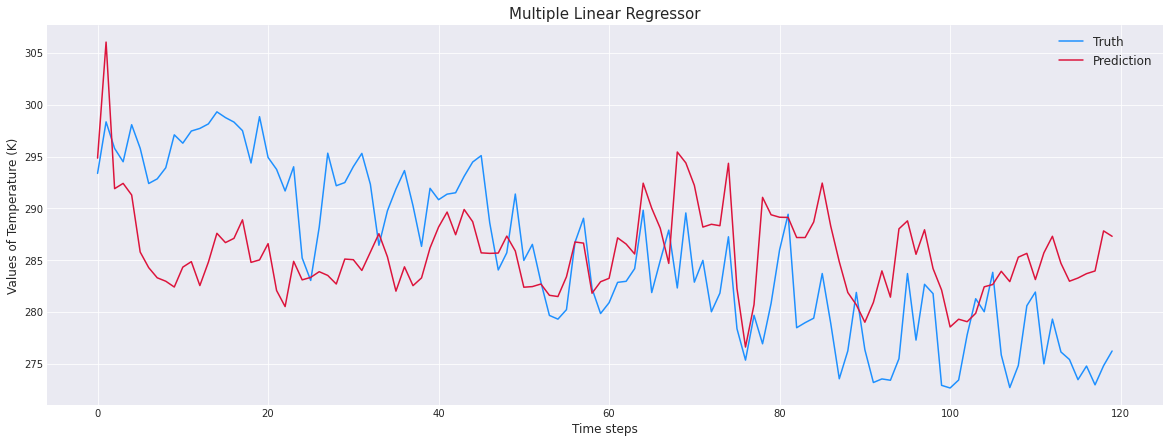

In [78]:
plt.figure(figsize=(20,7))
plt.plot(test_y.values[7180:7300], label='Truth',color='dodgerblue')
plt.plot(prediction[7180:7300], label='Prediction',color='crimson')
plt.ylabel('Values of Temperature (K)', fontsize=12)
plt.xlabel('Time steps', fontsize=12)
plt.title('Multiple Linear Regressor', fontsize='15')
plt.legend(fontsize=12)
plt.savefig('Multiple Linear Regressor.png')
plt.show()

In [60]:
from sklearn.tree import DecisionTreeRegressor
regressor=DecisionTreeRegressor(random_state=0)
regressor.fit(train_X,train_y)

DecisionTreeRegressor(random_state=0)

In [51]:
prediction2=regressor.predict(test_X)
np.mean(np.absolute(prediction2-test_y))

8.050474731506835

In [52]:
print('Variance score: %.2f' % regressor.score(test_X, test_y))

Variance score: -0.20


In [53]:
for i in range(len(prediction2)):
  prediction2[i]=round(prediction2[i],2)
pd.DataFrame({'Actual':test_y,'Prediction':prediction2,'diff':(test_y-prediction2)})

,Actual,Prediction,diff
Date,,,
1995-01-01,268.50632,275.69,-7.18368
1995-01-02,278.63257,288.71,-10.07743
1995-01-03,275.62552,278.28,-2.65448
1995-01-04,274.21042,288.71,-14.49958
1995-01-05,266.71692,272.51,-5.79308
...,...,...,...
2014-12-27,273.45140,284.87,-11.41860
2014-12-28,274.76535,292.57,-17.80465
2014-12-29,272.95187,285.79,-12.83813


In [59]:
print('MSE: ', metrics.mean_squared_error(test_y, prediction2))
print('MAE: ', metrics.mean_absolute_error(test_y, prediction2))
print('R2: ', metrics.r2_score(test_y, prediction2))
print('Correlation: ', stats.pearsonr(test_y, prediction2)[0])
print('RSMLE: ', metrics.mean_squared_log_error(test_y, prediction2 ))
print('MAPE: ', metrics.mean_absolute_percentage_error(test_y, prediction2 ))

MSE:  108.13395879327466
MAE:  8.050471246575341
R2:  -0.19804652296072156
Correlation:  0.3928163716959214
RSMLE:  0.0013338201458392958
MAPE:  0.02828916490615672


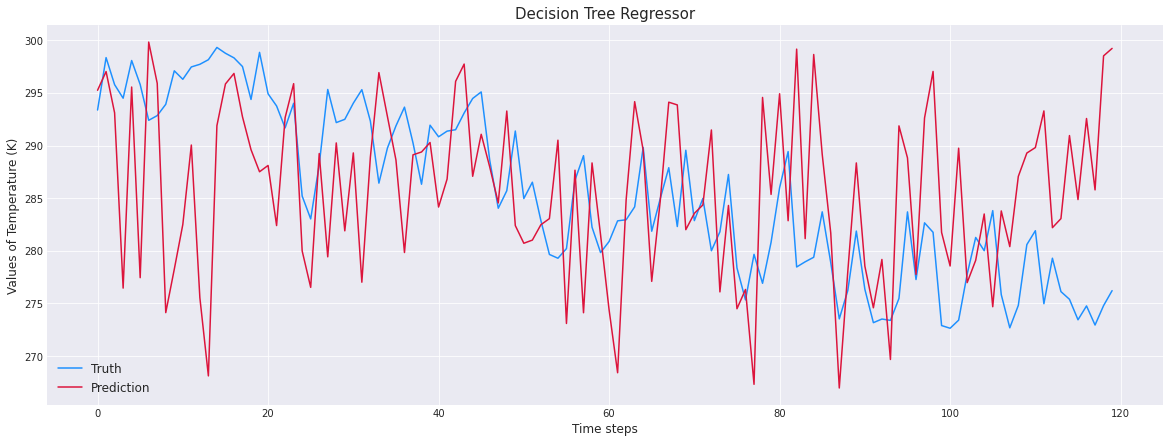

In [79]:
plt.figure(figsize=(20,7))
plt.plot(test_y.values[7180:7300], label='Truth',color='dodgerblue')
plt.plot(prediction2[7180:7300], label='Prediction',color='crimson')
plt.ylabel('Values of Temperature (K)', fontsize=12)
plt.xlabel('Time steps', fontsize=12)
plt.title('Decision Tree Regressor', fontsize='15')
plt.legend(fontsize=12)
plt.savefig('Decision Tree Regressor.png')
plt.show()

In [61]:
from sklearn.ensemble import RandomForestRegressor
regr=RandomForestRegressor(max_depth=90,random_state=0,n_estimators=100)
regr.fit(train_X,train_y)

RandomForestRegressor(max_depth=90, random_state=0)

In [62]:
prediction3=regr.predict(test_X)
np.mean(np.absolute(prediction3-test_y))

6.202840609342474

In [63]:
print('Variance score: %.2f' % regr.score(test_X, test_y))

Variance score: 0.34


In [64]:
for i in range(len(prediction3)):
  prediction3[i]=round(prediction3[i],2)
pd.DataFrame({'Actual':test_y,'Prediction':prediction3,'diff':(test_y-prediction3)})

,Actual,Prediction,diff
Date,,,
1995-01-01,268.50632,274.77,-6.26368
1995-01-02,278.63257,280.67,-2.03743
1995-01-03,275.62552,278.88,-3.25448
1995-01-04,274.21042,278.78,-4.56958
1995-01-05,266.71692,271.12,-4.40308
...,...,...,...
2014-12-27,273.45140,287.22,-13.76860
2014-12-28,274.76535,289.31,-14.54465
2014-12-29,272.95187,290.94,-17.98813


In [77]:
print('MSE: ', metrics.mean_squared_error(test_y, prediction3))
print('MAE: ', metrics.mean_absolute_error(test_y, prediction3))
print('R2: ', metrics.r2_score(test_y, prediction3))
print('Correlation: ', stats.pearsonr(test_y, prediction3)[0])
print('RSMLE: ', metrics.mean_squared_log_error(test_y, prediction3 ))
print('MAPE: ', metrics.mean_absolute_percentage_error(test_y, prediction3 ))

MSE:  59.32578919258975
MAE:  6.20282709589041
R2:  0.34271290668308185
Correlation:  0.5887430340295807
RSMLE:  0.0007293692617918438
MAPE:  0.021785458875911434


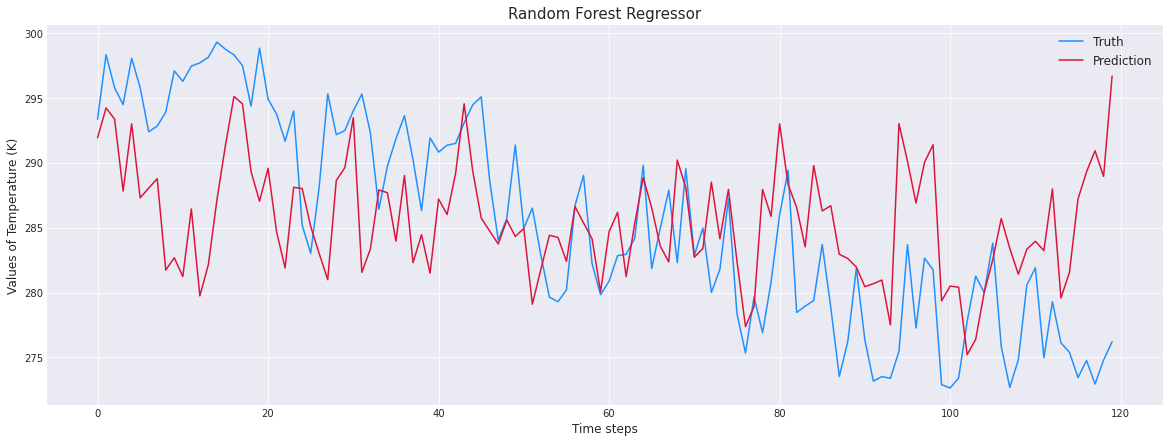

In [80]:
plt.figure(figsize=(20,7))
plt.plot(test_y.values[7180:7300], label='Truth',color='dodgerblue')
plt.plot(prediction3[7180:7300], label='Prediction',color='crimson')
plt.ylabel('Values of Temperature (K)', fontsize=12)
plt.xlabel('Time steps', fontsize=12)
plt.title('Random Forest Regressor', fontsize='15')
plt.legend(fontsize=12)
plt.savefig('Random Forest Regressor.png')
plt.show()

Random Forest Regression